In [1]:
import numpy as np
from array import array
import os
import sys
from Plot_func import SetHisto
from Plot_func import SetGlobalStyle
from Plot_func import SetCanvas
from Plot_func import SetLegend
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.26/06


In [2]:
muon_mass = 0.1056583755 #GeV/c^2
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/"
filetitle = "MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS"

png = ".png"
folder+=filetitle+"/"
filename = folder+filetitle+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      

In [3]:
hpRes = ROOT.TH1D( 'hpres', 'hpRes', 21, -0.2, 0.2 )
hpResKend = ROOT.TH1D( 'hpres', 'hpRes', 21, -0.2, 0.2 )
hpResILRM = ROOT.TH1D( 'hpres', 'hpRes', 21, -0.2, 0.2 )

htanlambdaRes = ROOT.TH1D( 'htanlambdaRes', 'htanlambdaRes', 31, -0.03, 0.03 )
htanlambdaResKend = ROOT.TH1D( 'htanlambdaResKend', 'htanlambdaResKend', 31, -0.03, 0.03 )
htanlambdaResILRM = ROOT.TH1D( 'htanlambdaILRM', 'htanlambdaILRM', 31, -0.03, 0.03 )

hsinPhiRes = ROOT.TH1D( 'hsinPhiRes', 'hsinPhiRes', 21, -0.06, 0.06 )
hsinPhiResKend = ROOT.TH1D( 'hsinPhiResKend', 'hsinPhiResKend', 21, -0.06, 0.06 )
hsinPhiResILRM = ROOT.TH1D( 'hsinPhiILRM', 'hsinPhiILRM', 21, -0.06, 0.06 )

hNPoints = ROOT.TH1D( 'NPoints', 'hNPoints', 20, 0, 20 )
hLength = ROOT.TH1D( 'Length', 'Length', 21, 0, 800 )
hNPlanes = ROOT.TH1D( 'NPlanes', 'NPlanes', 7, 0, 7 )
hp = ROOT.TH1D( 'Momentum', 'Momentum', 21, 0, 5 )


Warning in <TFile::Append>: Replacing existing TH1: hpres (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hpres (Potential memory leak).


In [4]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_MC.Y()
        xMC = t.xyz_MC.X()
        sinphiMC = t.sinphi_MC   
        tanlambdaMC = t.tanlambda_MC
        invpTMC = t.invpT_MC
        pMC = np.sqrt(t.pxyz_MC.Mag2())
        
        ySeed = t.xyz_seed.Y()
        xSeed = t.xyz_seed.X()
        sinphiSeed= t.sinphi_seed
        tanlambdaSeed=t.tanlambda_seed
        invpTSeed = -t.curvature_seed/(0.5*0.00299792458)
        pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeed)))*(0.5*0.299792458e-2)/t.curvature_seed)

        yILRM = t.xyz_seed_old.Y()
        xILRM = t.xyz_seed_old.X()
        sinphiILRM= t.sinphi_seed_old
        tanlambdaILRM=t.tanlambda_seed_old
        invpTILRM = -t.curvature_seed_old/(0.5*0.00299792458)
        pILRM = np.abs((1/np.cos(np.arctan(tanlambdaILRM)))*(0.5*0.299792458e-2)/t.curvature_seed_old)

        if(t.status ==1):
            last_n = t.parvect_bkw.size()-1
            y = t.parvect_bkw[last_n][0]
            x = t.parvect_bkw[last_n][1]
            sinphi= t.parvect_bkw[last_n][2]
            tanlambda=t.parvect_bkw[last_n][3]
            invpT = t.parvect_bkw[last_n][4]
            p = np.abs((1/np.cos(np.arctan(t.parvect_bkw[last_n][3])))/t.parvect_bkw[last_n][4])
        else:
            y = t.xyz_seed.Y()
            x = t.xyz_seed.X()
            sinphi= t.sinphi_seed
            tanlambda=t.tanlambda_seed
            invpT = -t.curvature_seed/(0.5*0.00299792458)
            p =  np.abs((1/np.cos(np.arctan(tanlambdaSeed)))*(0.5*0.299792458e-2)/t.curvature_seed)

        htanlambdaRes.Fill(tanlambdaSeed-tanlambdaMC)
        htanlambdaResKend.Fill(tanlambda-tanlambdaMC)
        htanlambdaResILRM.Fill(tanlambdaILRM-tanlambdaMC)

        hsinPhiRes.Fill(sinphiSeed-sinphiMC)
        hsinPhiResKend.Fill(sinphi-sinphiMC)
        hsinPhiResILRM.Fill(sinphiILRM-sinphiMC)

        hpRes.Fill((pSeed-pMC)/pMC)
        hpResKend.Fill((p-pMC)/pMC)
        hpResILRM.Fill((pILRM-pMC)/pMC)


        hNPoints.Fill(last_n +1)
        Length = 0
        for n in range(1,t.xyz_plane.size()):
            Length+=np.sqrt( np.square(t.xyz_plane[n].X()-t.xyz_plane[n-1].X())+np.square(t.xyz_plane[n].Y()-t.xyz_plane[n-1].Y())+np.square(t.xyz_plane[n].Z()-t.xyz_plane[n-1].Z()))
        hLength.Fill(Length)
        hp.Fill(pMC)
        
hpRes.Scale(1/hpRes.GetEntries())
hpResKend.Scale(1/hpResKend.GetEntries())
hpResILRM.Scale(1/hpResILRM.GetEntries())

htanlambdaRes.Scale(1/htanlambdaRes.GetEntries())
htanlambdaResKend.Scale(1/ htanlambdaResKend.GetEntries())
htanlambdaResILRM.Scale(1/ htanlambdaResILRM.GetEntries())

hsinPhiRes.Scale(1/hsinPhiRes.GetEntries())
hsinPhiResKend.Scale(1/ hsinPhiResKend.GetEntries())
hsinPhiResILRM.Scale(1/ hsinPhiResKend.GetEntries())

### p Residuals

In [6]:
gStyle.SetOptStat(0)
SetGlobalStyle()

width = hpRes.GetBinWidth(0)
range = hpRes.GetXaxis().GetXmax()-hpRes.GetXaxis().GetXmin()
Formula = str(width)+"*(1/"+str(range)+")*(1/sqrt(2*TMath::Pi()))*([0]/[2]*exp(-0.5*((x-[1])/[2])^2)+[3]/[5]*exp(-0.5*((x-[4])/[5])^2))"
double_gauss = ROOT.TF1("double_gauss",Formula,-4,4)
double_gauss.SetParameters(0.1,hpRes.GetMean(),hpRes.GetRMS(),0.1,hpRes.GetRMS(),hpRes.GetRMS()*2)
double_gauss.SetParNames("A_{core}","#mu_{core}","#sigma_{core}","A_{tail}","#mu_{tail}","#sigma_{tail}")
double_gauss.SetParLimits(0,0.1,1)
double_gauss.SetParLimits(2,0.002,0.09)
double_gauss.SetParLimits(3,0,1)
double_gauss.SetParLimits(4,-0.1,0.1)
double_gauss.SetLineWidth(4)

 FCN=57.3867 FROM MIGRAD    STATUS=CONVERGED     233 CALLS         234 TOTAL
                     EDM=1.51152e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.38920e-01   5.88915e-03   5.99299e-06   2.63852e-02
   2  #mu_{core}   5.80594e-04   2.54981e-04   2.64321e-08  -2.75330e-01
   3  #sigma_{core}   2.03837e-02   3.12286e-04  -7.77719e-06   2.11268e-02
   4  A_{tail}     5.00791e-02   4.62683e-03  -7.55940e-06  -9.06468e-03
   5  #mu_{tail}   2.02001e-03   2.10201e-03   5.05592e-07  -3.53738e-03
   6  #sigma_{tail}   6.46050e-02   3.35622e-03  -2.75587e-06   1.94689e-02


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/pResKF_doublegauss.eps has been created


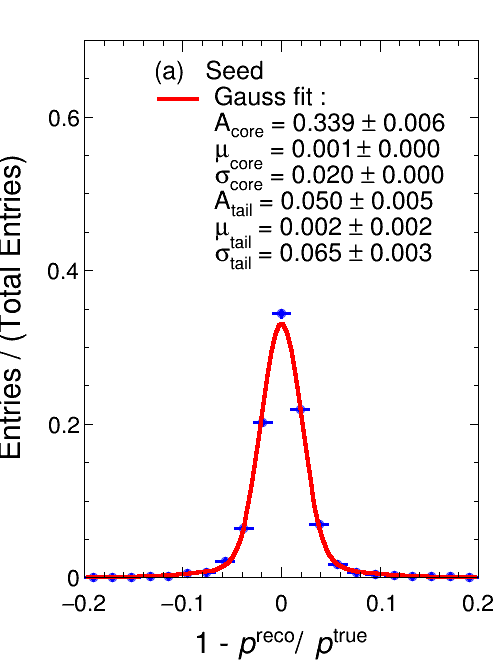

In [6]:


SetHisto(hpRes,";1 - #it{p}^{reco}/ #it{p}^{true};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.7])
hpRes.GetXaxis().SetTitleSize(0.065)
hpRes.GetXaxis().SetTitleOffset(0.95)
hpRes.GetYaxis().SetTitleSize(0.065)
hpRes.GetYaxis().SetTitleOffset(1.4)
hpRes.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(a)   Seed")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
hpRes.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"pResKF_doublegauss"+".eps"
ch4.Print(save)

 FCN=65.0593 FROM MIGRAD    STATUS=CONVERGED     275 CALLS         276 TOTAL
                     EDM=2.85583e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.29742e-01   5.51630e-03   3.83963e-05  -6.41965e-03
   2  #mu_{core}   5.81058e-04   2.47004e-04   9.63006e-07   2.13457e-01
   3  #sigma_{core}   1.98696e-02   2.91038e-04   2.32495e-05   6.75447e-03
   4  A_{tail}     5.06816e-02   4.34635e-03   3.77452e-05  -1.10367e-02
   5  #mu_{tail}   3.65747e-03   2.32218e-03   7.77586e-05  -7.82694e-03
   6  #sigma_{tail}   6.46773e-02   3.44747e-03   7.12973e-06   1.24652e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/pResKF_doublegauss.eps has been created


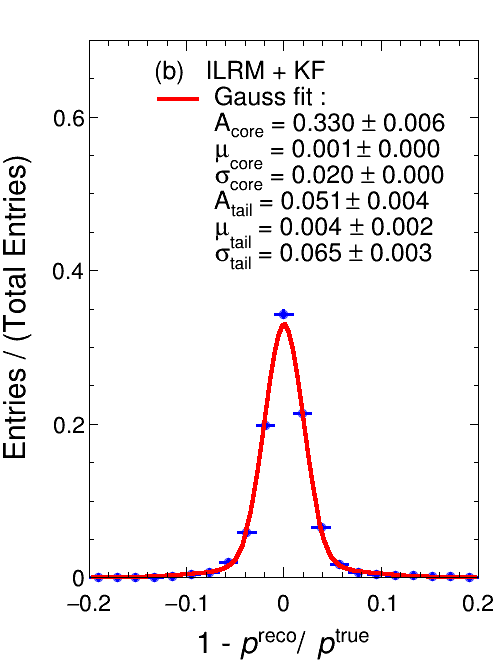

In [7]:
double_gauss.SetParameters(0.1,hpResKend.GetMean(),hpResKend.GetRMS(),0.1,hpResKend.GetRMS(),hpResKend.GetRMS()*2)

SetHisto(hpResKend,";1 - #it{p}^{reco}/ #it{p}^{true};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.7])
hpResKend.GetXaxis().SetTitleSize(0.065)
hpResKend.GetXaxis().SetTitleOffset(0.95)
hpResKend.GetYaxis().SetTitleSize(0.065)
hpResKend.GetYaxis().SetTitleOffset(1.4)
hpResKend.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
if(filetitle=="MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS"): legend4.SetHeader("(a)   3-point Seed + KF ")
else: legend4.SetHeader("(b)   ILRM + KF ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
hpResKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"pResKF_doublegauss"+".eps"
ch4.Print(save)

 FCN=57.8575 FROM MIGRAD    STATUS=CONVERGED     270 CALLS         271 TOTAL
                     EDM=1.88341e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.36775e-01   5.49655e-03   3.62765e-05  -1.06855e-03
   2  #mu_{core}  -4.00879e-02   2.38652e-04   8.80646e-07   8.20092e-02
   3  #sigma_{core}   1.94445e-02   2.82582e-04   2.16838e-05   3.04704e-03
   4  A_{tail}     5.22804e-02   4.28219e-03   3.56488e-05  -8.64659e-04
   5  #mu_{tail}  -3.56616e-02   2.15912e-03   7.67786e-05  -1.52225e-03
   6  #sigma_{tail}   6.35168e-02   3.24628e-03   6.72715e-06   1.14767e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/pResILRM_doublegauss.eps has been created


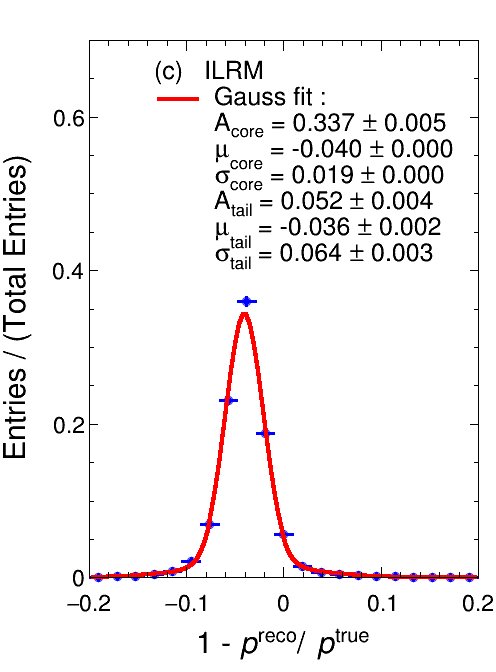

In [8]:
double_gauss.SetParameters(0.1,hpResILRM.GetMean(),hpResILRM.GetRMS(),0.1,hpResILRM.GetRMS(),hpResILRM.GetRMS()*2)

SetHisto(hpResILRM,";1 - #it{p}^{reco}/ #it{p}^{true};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.7])
hpResILRM.GetXaxis().SetTitleSize(0.065)
hpResILRM.GetXaxis().SetTitleOffset(0.95)
hpResILRM.GetYaxis().SetTitleSize(0.065)
hpResILRM.GetYaxis().SetTitleOffset(1.4)
hpResILRM.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(c)   ILRM  ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
hpResILRM.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"pResILRM_doublegauss"+".eps"
ch4.Print(save)

### tanlambda

 FCN=25.9889 FROM MIGRAD    STATUS=CONVERGED     631 CALLS         632 TOTAL
                     EDM=2.59488e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.87021e-02   4.34052e-04   5.28444e-06   2.69032e-01
   2  #mu_{core}  -6.27168e-06   9.08692e-05   2.18293e-07  -1.04386e-01
   3  #sigma_{core}   8.06138e-03   7.95559e-05   7.44439e-06   3.45532e-01
   4  A_{tail}     1.03045e-02   1.19842e-02   3.54970e-05   1.34416e-01
   5  #mu_{tail}   9.95951e-02   1.12554e-01   1.44342e-02  -3.60455e-04
   6  #sigma_{tail}   2.05256e-01   2.75751e-01   9.26645e-05  -5.06793e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/tanlambdaRes_doublegauss.eps has been created


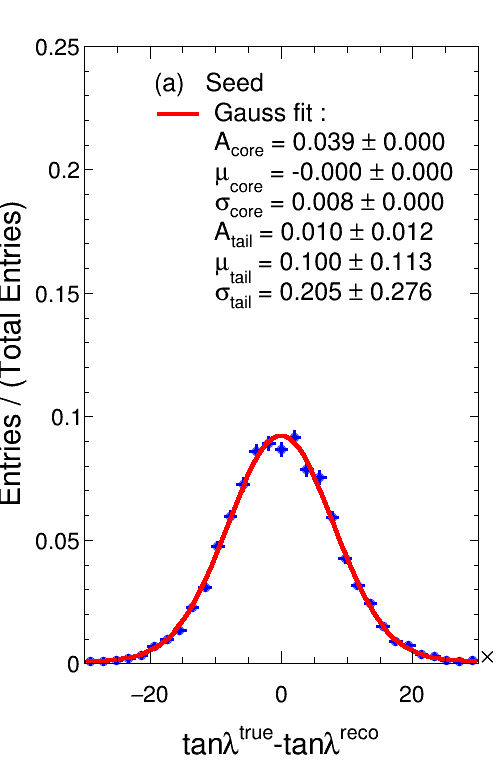

In [9]:
double_gauss.SetParameters(0.1,htanlambdaRes.GetMean(),htanlambdaRes.GetRMS(),0.1,htanlambdaRes.GetRMS(),htanlambdaRes.GetRMS()*2)
double_gauss.SetParLimits(0,0,1)
SetHisto(htanlambdaRes,";tan#lambda^{true}-tan#lambda^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.25])
htanlambdaRes.GetXaxis().SetTitleSize(0.065)
htanlambdaRes.GetXaxis().SetTitleOffset(0.95)
htanlambdaRes.GetYaxis().SetTitleSize(0.065)
htanlambdaRes.GetYaxis().SetTitleOffset(1.4)
htanlambdaRes.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(a)   Seed  ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,800)
SetCanvas(ch4)
htanlambdaRes.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"tanlambdaRes_doublegauss"+".eps"
ch4.Print(save)

 FCN=52.5152 FROM MIGRAD    STATUS=CONVERGED     168 CALLS         169 TOTAL
                     EDM=1.63348e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.76693e-02   4.19080e-04   1.58832e-06  -2.16844e-02
   2  #mu_{core}  -7.43137e-05   8.06698e-05  -1.17401e-07   3.34725e-01
   3  #sigma_{core}   7.14529e-03   7.06030e-05  -1.29508e-06   2.63038e-02
   4  A_{tail}     1.41247e-02   3.12336e-03  -2.76775e-05  -7.79652e-03
   5  #mu_{tail}   9.99954e-02   9.32045e-03  -1.38999e-04   1.86490e-03
   6  #sigma_{tail}   1.47310e-01   5.35592e-02  -3.94897e-05   5.68498e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/tanlambdaResKF_doublegauss.eps has been created


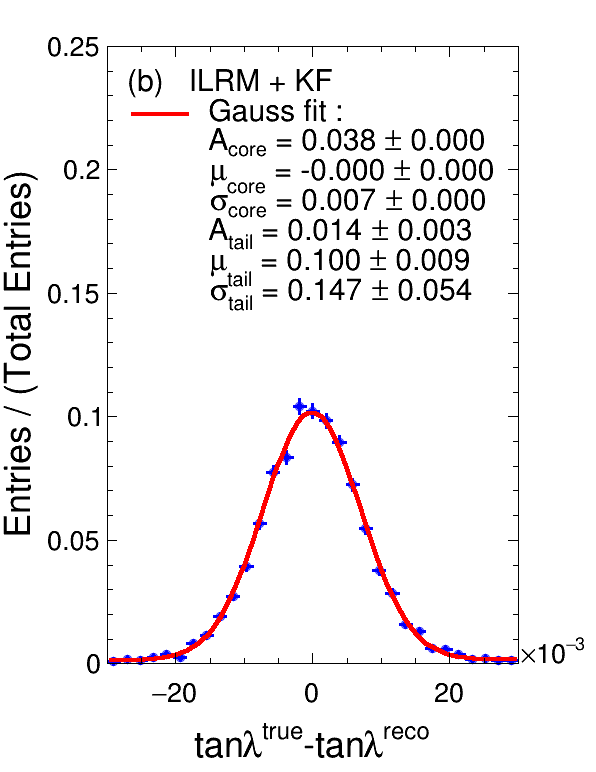

In [10]:
SetHisto(htanlambdaResKend,";tan#lambda^{true}-tan#lambda^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.25])
htanlambdaResKend.GetXaxis().SetTitleSize(0.065)
htanlambdaResKend.GetXaxis().SetTitleOffset(0.95)
htanlambdaResKend.GetYaxis().SetTitleSize(0.065)
htanlambdaResKend.GetYaxis().SetTitleOffset(1.4)
htanlambdaResKend.Fit("double_gauss")
legend4 = ROOT.TLegend(0.2,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
if(filetitle=="MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS"): legend4.SetHeader("(a)   3-point Seed + KF ")
else: legend4.SetHeader("(b)   ILRM + KF ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",600,800)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
ch4.SetRightMargin(0.13)
htanlambdaResKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"tanlambdaResKF_doublegauss"+".eps"
ch4.Print(save)

 FCN=25.9889 FROM MIGRAD    STATUS=CONVERGED     248 CALLS         249 TOTAL
                     EDM=3.17685e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.87021e-02   4.34307e-04   5.28443e-06   2.76368e-02
   2  #mu_{core}  -6.28484e-06   9.08808e-05   2.18293e-07  -9.15286e-01
   3  #sigma_{core}   8.06138e-03   7.95799e-05   7.44437e-06   4.29895e-02
   4  A_{tail}     1.02277e-02   2.02423e-02   3.53710e-05   1.17067e-03
   5  #mu_{tail}   9.84531e-02   1.91333e-01   8.22446e-03  -1.05205e-04
   6  #sigma_{tail}   2.03986e-01   3.88994e-01   9.18528e-05  -3.12139e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/tanlambdaResILRM_doublegauss.eps has been created


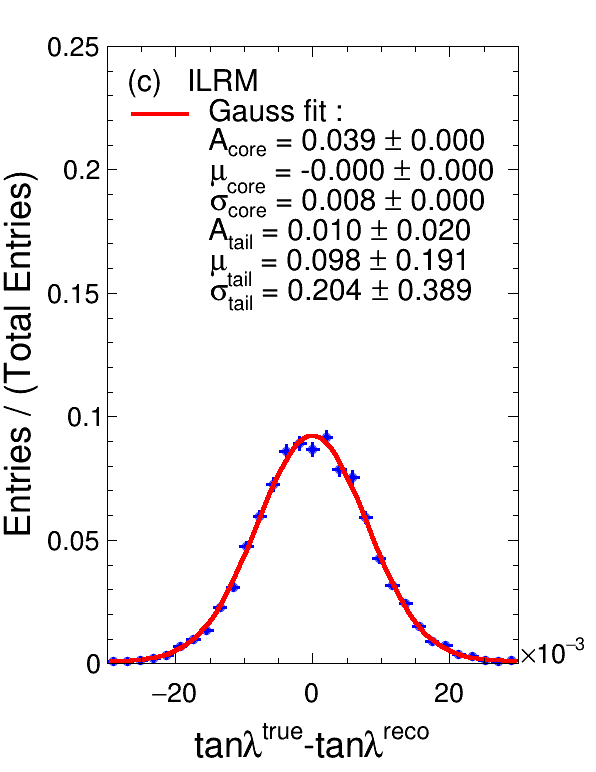

In [11]:
SetHisto(htanlambdaResILRM,";tan#lambda^{true}-tan#lambda^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.25])
htanlambdaResILRM.GetXaxis().SetTitleSize(0.065)
htanlambdaResILRM.GetXaxis().SetTitleOffset(0.95)
htanlambdaResILRM.GetYaxis().SetTitleSize(0.065)
htanlambdaResILRM.GetYaxis().SetTitleOffset(1.4)
htanlambdaResILRM.Fit("double_gauss")
legend4 = ROOT.TLegend(0.2,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(c)   ILRM ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",600,800)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
ch4.SetRightMargin(0.13)
htanlambdaResILRM.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"tanlambdaResILRM_doublegauss"+".eps"
ch4.Print(save)

### SinPhi

 FCN=8.39021 FROM MIGRAD    STATUS=CONVERGED     597 CALLS         598 TOTAL
                     EDM=8.02454e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     6.64839e-03   1.20248e-03   6.21467e-05   1.73851e-01
   2  #mu_{core}  -1.58527e-03   1.03348e-03   1.07535e-05  -3.89494e-01
   3  #sigma_{core}   1.95255e-02   1.43656e-03   6.06953e-05   1.82440e-02
   4  A_{tail}     1.10964e-01   1.65891e-03  -6.98564e-06  -6.95966e-02
   5  #mu_{tail}   1.85732e-04   8.71140e-05   6.12449e-06  -2.97672e-01
   6  #sigma_{tail}   7.61017e-03   8.69900e-05  -3.70887e-07   1.65138e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/sinPhiRes_doublegauss.eps has been created


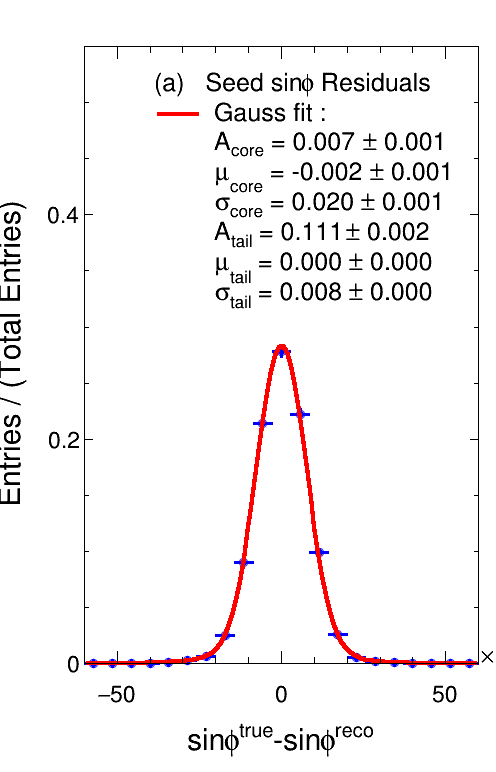

In [12]:
double_gauss.SetParameters(0.1,hsinPhiRes.GetMean(),hsinPhiRes.GetRMS(),0.1,hsinPhiRes.GetRMS(),hsinPhiRes.GetRMS()*2)
SetHisto(hsinPhiRes,";sin#phi^{true}-sin#phi^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.55])
hsinPhiRes.GetXaxis().SetTitleSize(0.065)
hsinPhiRes.GetXaxis().SetTitleOffset(0.95)
hsinPhiRes.GetYaxis().SetTitleSize(0.065)
hsinPhiRes.GetYaxis().SetTitleOffset(1.4)
hsinPhiRes.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(a)   Seed sin#phi Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,800)
SetCanvas(ch4)
hsinPhiRes.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"sinPhiRes_doublegauss"+".eps"
ch4.Print(save)

 FCN=16.3742 FROM MIGRAD    STATUS=CONVERGED     456 CALLS         457 TOTAL
                     EDM=1.59719e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     1.37281e-02   1.72260e-03  -4.65634e-05   3.84815e-03
   2  #mu_{core}  -3.44476e-03   6.59029e-04  -8.54668e-07   6.58635e-01
   3  #sigma_{core}   1.75404e-02   8.20301e-04   1.01696e-04  -1.66839e-02
   4  A_{tail}     1.01231e-01   1.98936e-03   1.81974e-05   8.51564e-02
   5  #mu_{tail}  -3.31975e-04   9.36998e-05   1.00866e-06   6.10137e-01
   6  #sigma_{tail}   7.26864e-03   1.05442e-04   9.84539e-08   2.75798e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/sinPhiResKF_doublegauss.eps has been created


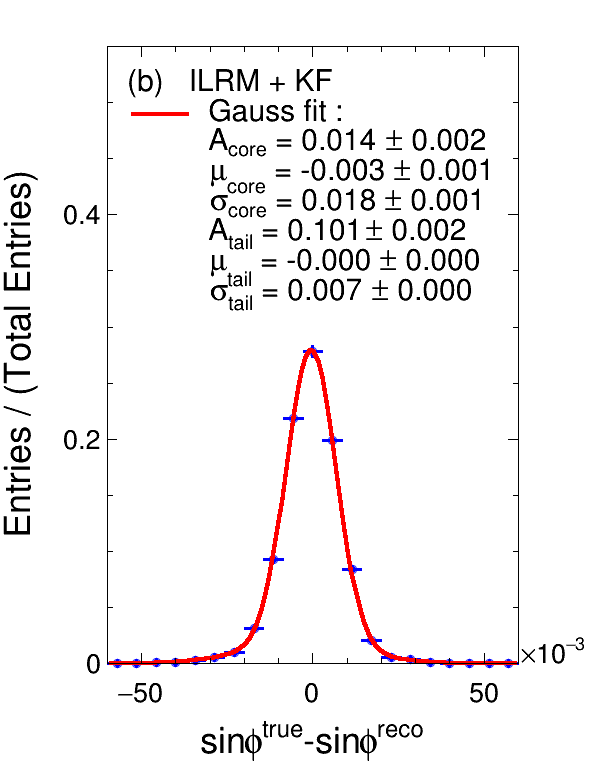

In [13]:
double_gauss.SetParameters(0.1,hsinPhiResKend.GetMean(),hsinPhiResKend.GetRMS(),0.1,hsinPhiResKend.GetRMS(),hsinPhiResKend.GetRMS()*2)
SetHisto(hsinPhiResKend,";sin#phi^{true}-sin#phi^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.55])
hsinPhiResKend.GetXaxis().SetTitleSize(0.065)
hsinPhiResKend.GetXaxis().SetTitleOffset(0.95)
hsinPhiResKend.GetYaxis().SetTitleSize(0.065)
hsinPhiResKend.GetYaxis().SetTitleOffset(1.4)
hsinPhiResKend.Fit("double_gauss")
legend4 = ROOT.TLegend(0.2,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
if(filetitle=="MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS"): legend4.SetHeader("(a)   3-point Seed + KF ")
else: legend4.SetHeader("(b)   ILRM + KF ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",600,800)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
ch4.SetRightMargin(0.13)
hsinPhiResKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"sinPhiResKF_doublegauss"+".eps"
ch4.Print(save)

 FCN=8.39021 FROM MIGRAD    STATUS=CONVERGED     645 CALLS         646 TOTAL
                     EDM=6.14175e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     6.64781e-03   1.19722e-03   3.26643e-06   4.89039e-02
   2  #mu_{core}  -1.58558e-03   1.03104e-03   1.46801e-06  -8.70808e-01
   3  #sigma_{core}   1.95258e-02   1.43126e-03   1.47196e-05  -2.00222e-02
   4  A_{tail}     1.10965e-01   1.62810e-03  -5.13252e-06   1.33534e-01
   5  #mu_{tail}   1.85720e-04   8.78022e-05   9.96483e-08  -7.03937e-01
   6  #sigma_{tail}   7.61019e-03   8.59914e-05   2.40447e-07   1.00082e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/sinPhiResILRM_doublegauss.eps has been created


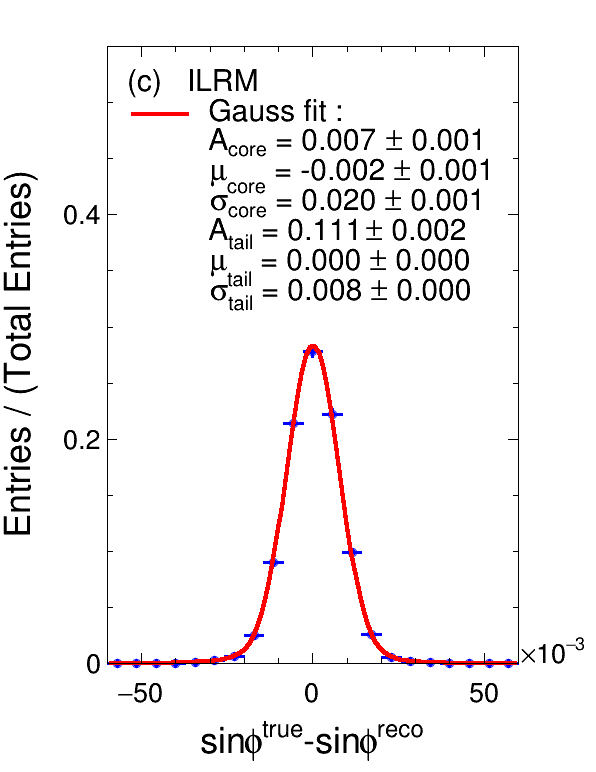

In [14]:
double_gauss.SetParameters(0.1,hsinPhiResILRM.GetMean(),hsinPhiResILRM.GetRMS(),0.1,hsinPhiResILRM.GetRMS(),hsinPhiResILRM.GetRMS()*2)
SetHisto(hsinPhiResILRM,";sin#phi^{true}-sin#phi^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.55])
hsinPhiResILRM.GetXaxis().SetTitleSize(0.065)
hsinPhiResILRM.GetXaxis().SetTitleOffset(0.95)
hsinPhiResILRM.GetYaxis().SetTitleSize(0.065)
hsinPhiResILRM.GetYaxis().SetTitleOffset(1.4)
hsinPhiResILRM.Fit("double_gauss")
legend4 = ROOT.TLegend(0.2,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(c)   ILRM ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",600,800)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
ch4.SetRightMargin(0.13)
hsinPhiResILRM.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"sinPhiResILRM_doublegauss"+".eps"
ch4.Print(save)

### Properties

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/NPointsAllTall.eps has been created


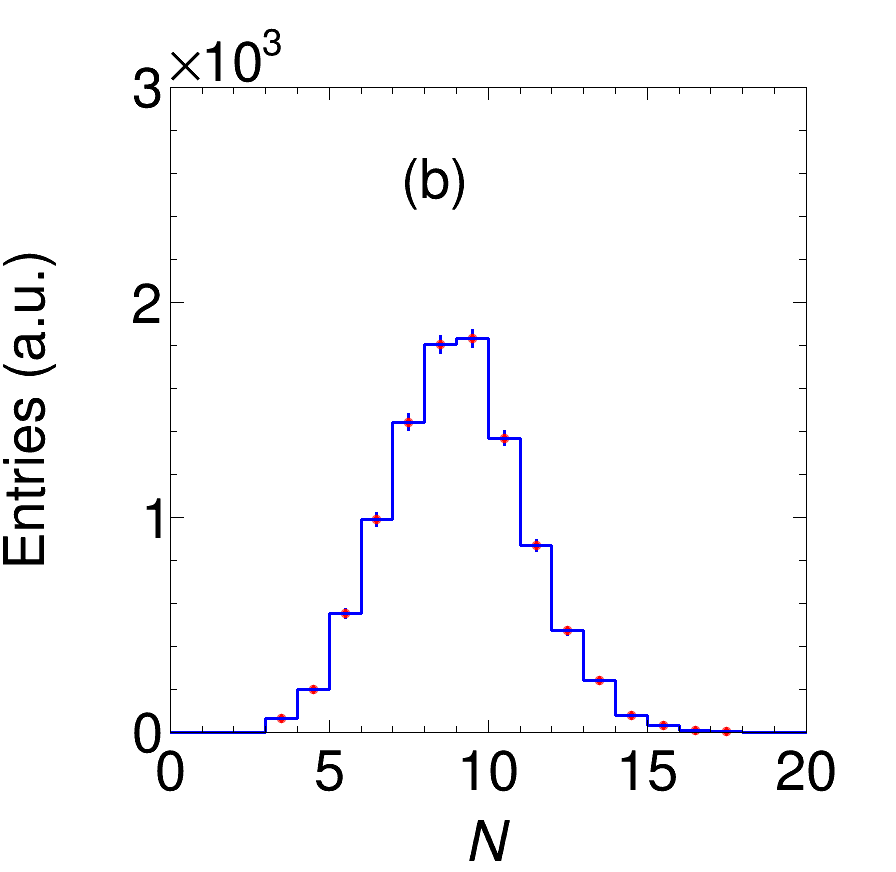

In [9]:
hq1 = ROOT.TCanvas("hq1","hq1",900,900)
SetCanvas(hq1)
hq1.SetLeftMargin(0.19)
hq1.SetBottomMargin(0.16)
hq1.SetTopMargin(1)
hq1.SetRightMargin(1)
SetHisto(hNPoints,";#it{N};Entries (a.u.)",ROOT.kRed,20,[0,3000])
hNPoints.SetLineColor(ROOT.kBlue)
hNPoints.GetXaxis().SetTitleSize(0.07)
hNPoints.GetXaxis().SetTitleOffset(1.1)
hNPoints.GetYaxis().SetTitleSize(0.07)
hNPoints.GetYaxis().SetTitleOffset(1.4)
hNPoints.GetXaxis().SetLabelSize(0.07)
hNPoints.GetYaxis().SetLabelSize(0.07)
hNPoints.Draw("E HIST")
legendchi2 = ROOT.TLegend(0.44,0.7,0.92,0.88)
SetLegend(legendchi2)
legendchi2.SetTextSize(0.05*0.68*2)
legendchi2.SetHeader("(b)")
legendchi2.Draw()
hq1.Draw()
hq1.Print(folder+"NPointsAllTall.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/LengthAllTall.eps has been created


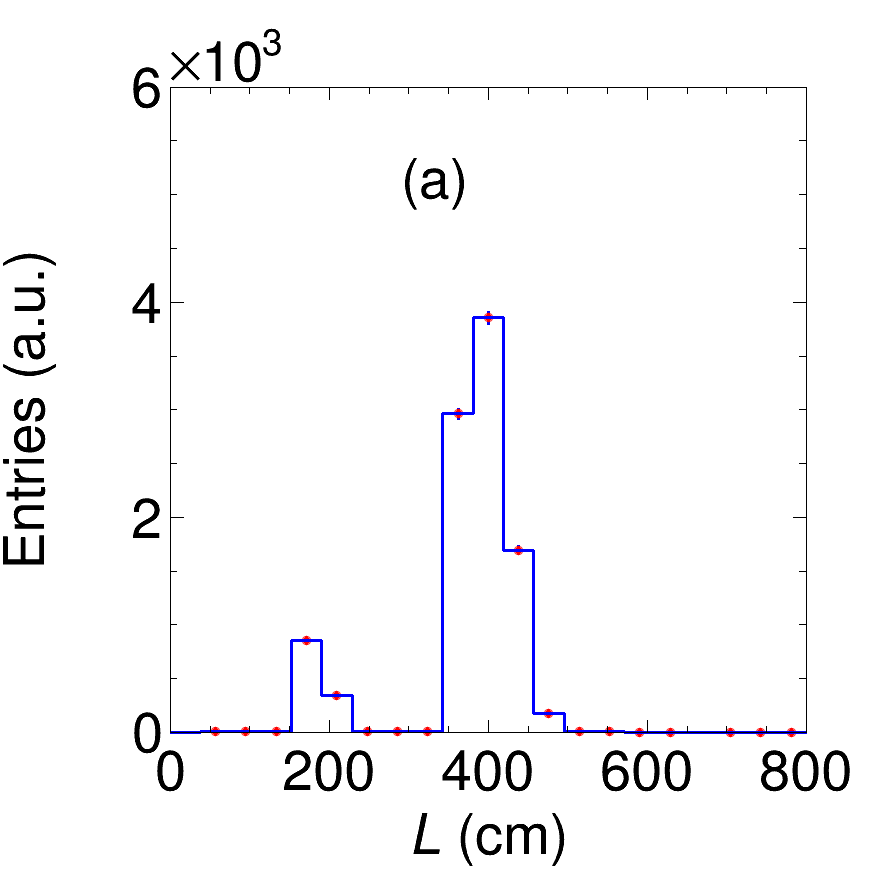

In [8]:
hq1 = ROOT.TCanvas("hq1","hq1",900,900)
SetCanvas(hq1)
hq1.SetLeftMargin(0.19)
hq1.SetBottomMargin(0.16)
hq1.SetTopMargin(1)
hq1.SetRightMargin(1)
SetHisto(hLength,";#it{L} (cm);Entries (a.u.)",ROOT.kRed,20,[0,6000])
hLength.SetLineColor(ROOT.kBlue)
hLength.GetXaxis().SetTitleSize(0.07)
hLength.GetXaxis().SetTitleOffset(1.1)
hLength.GetYaxis().SetTitleSize(0.07)
hLength.GetYaxis().SetTitleOffset(1.4)
hLength.GetXaxis().SetLabelSize(0.07)
hLength.GetYaxis().SetLabelSize(0.07)
hLength.Draw("E HIST")
legendchi2 = ROOT.TLegend(0.44,0.7,0.92,0.88)
SetLegend(legendchi2)
legendchi2.SetTextSize(0.05*0.68*2)
legendchi2.SetHeader("(a)")
legendchi2.Draw()
hq1.Draw()
hq1.Print(folder+"LengthAllTall.eps")